# **Projeto Acidentes em Rodovias Federais**

##### Notebook Destinado a limpeza de dados

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


In [2]:
df = pd.read_csv("../data/datatran2018.csv", encoding='iso-8859-1', delimiter=";")

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
print(df.shape)

(69333, 30)


In [5]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69333 entries, 0 to 69332
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      69333 non-null  float64
 1   data_inversa            69333 non-null  object 
 2   dia_semana              69333 non-null  object 
 3   horario                 69333 non-null  object 
 4   uf                      69333 non-null  object 
 5   br                      69333 non-null  int64  
 6   km                      69333 non-null  object 
 7   municipio               69333 non-null  object 
 8   causa_acidente          69333 non-null  object 
 9   tipo_acidente           69310 non-null  object 
 10  classificacao_acidente  69332 non-null  object 
 11  fase_dia                69333 non-null  object 
 12  sentido_via             69333 non-null  object 
 13  condicao_metereologica  69333 non-null  object 
 14  tipo_pista              69333 non-null

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,100027.0,2018-01-01,segunda-feira,06:00:00,TO,153,"393,1",RIO DOS BOIS,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Aclive,Não,2,0,0,1,1,0,1,2,"-9,35641407","-48,54610294",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,100044.0,2018-01-01,segunda-feira,08:30:00,SE,101,"123,4",ITAPORANGA DAJUDA,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,0,0,2,0,0,2,"-11,04476007","-37,36498",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,100046.0,2018-01-01,segunda-feira,08:50:00,TO,153,347,GUARAI,Falta de Atenção à Condução,Colisão lateral,NaN,Pleno dia,Crescente,Céu Claro,Simples,Reta;Interseção de Vias,Não,3,0,0,0,2,1,0,3,"-8,952295","-48,500107",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,100052.0,2018-01-01,segunda-feira,05:30:00,PA,155,221,ELDORADO DO CARAJAS,Ingestão de Álcool,Colisão lateral,Com Vítimas Fatais,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,2,1,0,0,1,0,0,2,"-6,345512","-49,389626",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,100053.0,2018-01-01,segunda-feira,10:25:00,BA,116,"289,6",TUCANO,Ultrapassagem Indevida,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,Não,2,0,0,1,0,1,1,2,"-11,08661652","-38,83420181",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


In [9]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [10]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000,69333.000000
mean,143135.305670,214.962644,2.523488,0.076068,0.850547,0.255636,1.065899,0.348896,1.106183,1.952894
std,28653.858106,130.866756,1.981121,0.324459,1.105517,0.608706,1.482770,0.748835,1.244884,1.051425
min,99973.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,120212.000000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,143515.000000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,163462.000000,343.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,594880.000000,498.000000,81.000000,13.000000,58.000000,28.000000,56.000000,15.000000,66.000000,21.000000


In [11]:
df.loc[0][0:15]

id                                           100027.0
data_inversa                               2018-01-01
dia_semana                              segunda-feira
horario                                      06:00:00
uf                                                 TO
br                                                153
km                                              393,1
municipio                                RIO DOS BOIS
causa_acidente            Falta de Atenção à Condução
tipo_acidente                         Colisão frontal
classificacao_acidente            Com Vítimas Feridas
fase_dia                                    Pleno dia
sentido_via                               Decrescente
condicao_metereologica                      Céu Claro
tipo_pista                                    Simples
Name: 0, dtype: object

Diversos erros nos dados podem ser encontrados, como formatação e colunas desnecessárias

#### **Escolhendo colunas para o modelo**

In [12]:
df = df[['data_inversa','fase_dia','horario', 'uf', 'br', 'causa_acidente', 'tipo_acidente', 'uso_solo', 'pessoas', 'classificacao_acidente']]

In [13]:
print(df.shape)

(69333, 10)


**Verificando se há valores nulos**

In [14]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

tipo_acidente             23
classificacao_acidente     1
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [15]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   12947
Saída de leito carroçável          11335
Colisão transversal                 8619
Colisão lateral                     8348
Tombamento                          5174
Colisão com objeto estático         5061
Colisão frontal                     4585
Atropelamento de Pedestre           3375
Queda de ocupante de veículo        3033
Capotamento                         2814
Atropelamento de Animal             1237
Engavetamento                        992
Incêndio                             931
Colisão com objeto em movimento      399
Derramamento de carga                236
Danos eventuais                      223
Colisão lateral mesmo sentido          1
Name: count, dtype: int64

In [16]:
#Atribuindo a moda para o valor faltante
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

In [17]:
df.dtypes[:20]

data_inversa              object
fase_dia                  object
horario                   object
uf                        object
br                         int64
causa_acidente            object
tipo_acidente             object
uso_solo                  object
pessoas                    int64
classificacao_acidente    object
dtype: object

O tipo object significa que pode haver dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

In [18]:
# Observando o formato dos dados
df['horario'].value_counts()

horario
18:00:00    1027
18:30:00     993
19:00:00     990
17:00:00     843
16:00:00     775
            ... 
11:16:00       1
05:16:00       1
05:43:00       1
19:33:00       1
16:24:00       1
Name: count, Length: 1292, dtype: int64

**Coluna uf**

In [19]:
df['uf'].value_counts()

uf
MG    9073
SC    8499
PR    7958
RJ    4577
SP    4517
RS    4449
BA    3559
GO    3465
PE    2716
ES    2642
MT    2632
CE    1697
RO    1630
PB    1589
MS    1530
RN    1417
PI    1371
MA    1275
PA    1260
DF     867
AL     691
TO     589
SE     559
AC     238
RR     236
AP     173
AM     124
Name: count, dtype: int64

In [20]:
df['uf'] = df['uf'].astype(str)

**Coluna BR**

In [21]:
# Convertendo para string

df['br'] = 'BR-' + df['br'].astype(int).astype(str)

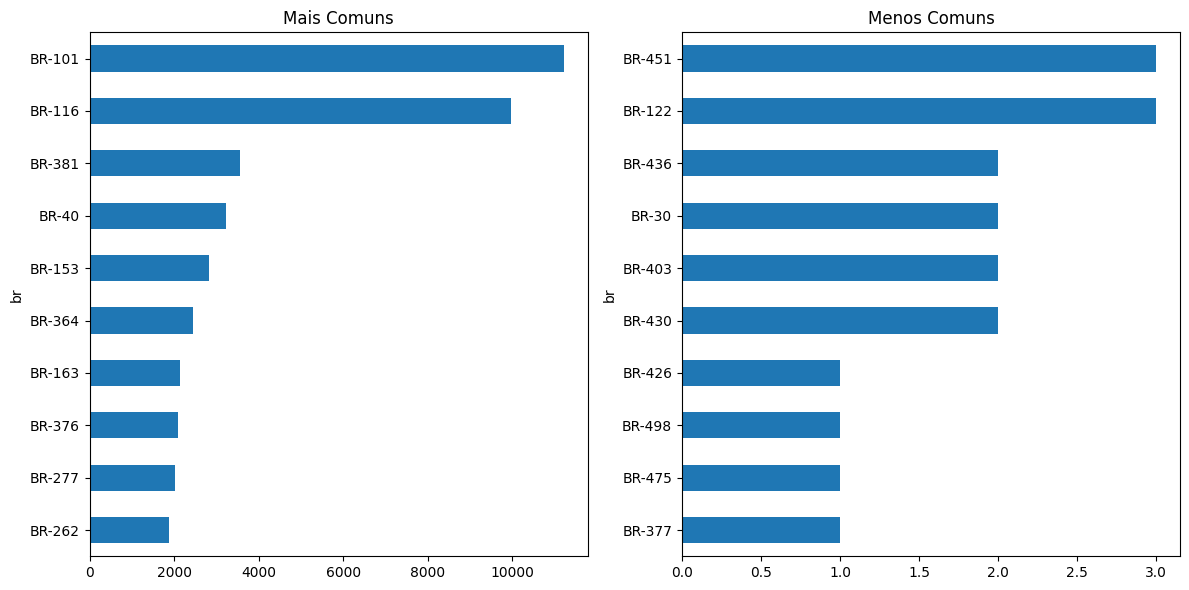

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df['br'].value_counts(ascending=True)[df["br"].unique().shape[0] - 10:].plot(kind="barh", ax=axs[0])
axs[0].set_title('Mais Comuns')

# Gráfico dos últimos 10 registros
df['br'].value_counts(ascending=True)[:10].plot(kind="barh", ax=axs[1])
axs[1].set_title('Menos Comuns')

plt.tight_layout()
plt.show()

**Coluna Causa_acidente**

In [23]:
df['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                       25841
Desobediência às normas de trânsito pelo condutor                                  7194
Velocidade Incompatível                                                            6850
Ingestão de Álcool                                                                 5203
Não guardar distância de segurança                                                 4266
Defeito Mecânico no Veículo                                                        3717
Condutor Dormindo                                                                  2633
Pista Escorregadia                                                                 2549
Falta de Atenção do Pedestre                                                       2074
Animais na Pista                                                                   1618
Ultrapassagem Indevida                                                             1333
Defeito na Via   

<Axes: ylabel='count'>

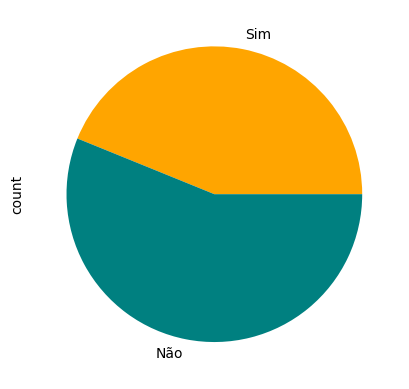

In [24]:
df['uso_solo'].value_counts(ascending=True).plot(kind="pie", colors=["orange", "teal"])

In [25]:
# Substituindo o valor 'sim' por urbano e 'Não' por rural
# Essas informações estão disponíveis no dicionário de dados da PRF

df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [26]:
df['uso_solo'] = df['uso_solo'].astype(str)

**Adicionando a coluna região**

In [27]:
def adicionar_coluna_regiao(df):
    # Dicionário de mapeamento de UF para região
    regiao_por_uf = {
        'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
        'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
        'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
        'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
        'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
        'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
    }
    
    # Adicionando a coluna 'região' com base na coluna 'uf'
    df['regiao'] = df['uf'].map(regiao_por_uf)
    
    return df

df = adicionar_coluna_regiao(df)

Dividindo e salvando o arquivo

In [28]:
df.to_csv('../data/acidentes.txt', index=False, sep=',')